In [1]:
import pymatgen.analysis.solar.slme as slme
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(["style.mplstyle"])

In [2]:
# In order to plot SLME and Blank metrics efficiency, absorption.dat, flat_eta_out, lamb_eta_out should already exist in the folder
# Load the absorption data
materials = {
    "Name_of_your_material": {
        "dir": 2.238,   # Direct bandgap value
        "indir": 2.238, # Indirect bandgap value
        "folder": "./", # Path to the folder that have all the required file
    },
    
  }  

## SLME & blank metric

Text(0, 0.5, 'Max PV Efficiency $(\\eta_{Max})$ / % ')

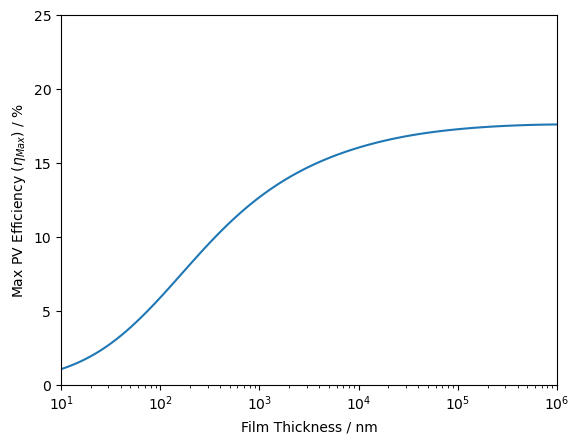

In [3]:
#Repeat over a range of thickness
thickness = np.logspace(-8, -3, 100, endpoint=True)
thickness_nm = thickness*1000000000

for material, material_data in materials.items():
    data = np.loadtxt(material_data["folder"] + '/absorption.dat', delimiter=' ')
    energy = data[:,0]
    alpha_cm = data[:,1]
    effSlm = []

for i in thickness:
    eff = data = slme.slme(energy,alpha_cm,material_data["dir"],material_data["indir"],thickness=i,absorbance_in_inverse_centimeters=True)
    effSlm.append(eff)

ax = plt.axes()
plt.plot(thickness_nm, effSlm)

# Format your own plot
plt.xscale('log')
plt.margins(x=0)
plt.ylim([0, 25])
plt.xlabel('Film Thickness / nm',labelpad=5)
plt.ylabel('Max PV Efficiency $(\\eta_{Max})$ / % ')

# plt.savefig('path_to_your_folder', format='pdf')


In [4]:
lamb = np.loadtxt(material_data["folder"] + '/lamb_eta_out', delimiter=' ')
thickness_lamb = lamb[:,0]
thickness_lamb_nm = thickness_lamb*1000000000
eff_lamb = [x*100 for x in lamb[:,1]]

flat = np.loadtxt(material_data["folder"] + '/flat_eta_out', delimiter=' ')
thickness_flat = flat[:,0]
thickness_flat_nm = thickness_flat*1000000000
eff_flat = [x*100 for x in flat[:,1]]

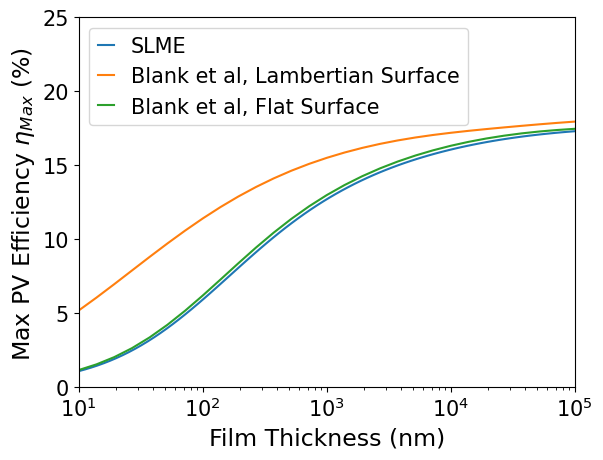

In [5]:
plt.plot(thickness_nm, effSlm, label = 'SLME')
plt.plot(thickness_lamb_nm, eff_lamb, label = 'Blank et al, Lambertian Surface')
plt.plot(thickness_flat_nm, eff_flat, label = 'Blank et al, Flat Surface')

# Format your own plot
plt.xscale('log')
plt.margins(x=0)
plt.ylim([0, 25])
plt.xlim([10,100000])
plt.xlabel('Film Thickness (nm)',labelpad=5,fontsize=17)
plt.ylabel('Max PV Efficiency $\\eta_{Max}$ (%) ',fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, handlelength=0.8)

# plt.savefig('path_to_your_folder', bbox_inches="tight", format='pdf')